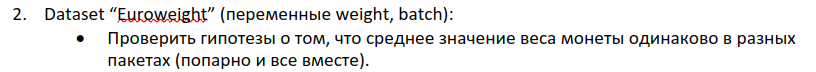

In [2]:
import pandas as pd
import scipy.stats as st

cols = ['ID', 'weight', 'batch']
df = pd.read_csv('datasets/euroweight.dat.txt', sep='\t', header=None, names=cols)

df.head()

,ID,weight,batch
0,1,7.512,1
1,2,7.502,1
2,3,7.461,1
3,4,7.562,1
4,5,7.528,1


In [3]:
df1 = df.loc[(df['batch'] == 1)]
df2 = df.loc[(df['batch'] == 2)]
df3 = df.loc[(df['batch'] == 3)]
df4 = df.loc[(df['batch'] == 4)]
df5 = df.loc[(df['batch'] == 5)]
df6 = df.loc[(df['batch'] == 6)]
df7 = df.loc[(df['batch'] == 7)]
df8 = df.loc[(df['batch'] == 8)]

dfs = [df1['weight'], df2['weight'], df3['weight'], df4['weight'], df5['weight'], df6['weight'], df7['weight'], df8['weight']]

### Проверка гипотезы о том, что среднее значение веса монеты одинаково в разных пакетах

##### Все вместе (ANOVA test)
Выборки независимы. 

Каждая выборка взята из нормально распределенной совокупности. 

Стандартные отклонения генеральной совокупности групп одинаковы.


In [4]:
st.f_oneway(df1['weight'], df2['weight'], df4['weight'], df5['weight'], df7['weight']) 

F_onewayResult(statistic=6.626480855140188, pvalue=2.819221671104079e-05)

In [5]:
# для норм распр
st.alexandergovern(df1['weight'], df2['weight'], df4['weight'], df5['weight'], df7['weight']) 

AlexanderGovernResult(statistic=27.3923422756099, pvalue=1.6558944569507707e-05)

Как видно из лаборатороной работы 2. Некоторые тесты отвергают гипотезу о том, 
что выборки 3, 6, 8 имеют нормальное распредление. Поэтому используем критерии Крускала 

In [6]:
st.kruskal(df1['weight'], df2['weight'], df3['weight'], df4['weight'], df5['weight'], df6['weight'], df7['weight'], df8['weight'])

KruskalResult(statistic=97.49984084853487, pvalue=3.53927567965911e-18)

##### Попарно
для выборок с нормальным распределением - критерий Стьюдента

для выборок с ненормальным распределнием - критерий Краскела_уолиса

In [11]:
def get_(pval):
    if pval < 0.05:
        return " -"
    else:
        return " +"

for i in range(len(dfs)):
    for j in range(i+1, len(dfs)):
        if i != 2 and j != 2 and i != 5 and j != 5 and i != 7 and j != 7: 
            print("Batches", i+1, j+1, get_(st.ttest_ind(dfs[i], dfs[j]).pvalue), st.ttest_ind(dfs[i], dfs[j]).pvalue)
        else:
            print("Batches", i+1, j+1, get_(st.kruskal(dfs[i], dfs[j]).pvalue), st.kruskal(dfs[i], dfs[j]).pvalue)
        

Batches 1 2  + 0.2614778067901794
Batches 1 3  - 0.002451695941628358
Batches 1 4  - 7.245319251258255e-05
Batches 1 5  - 4.9993849166524045e-05
Batches 1 6  + 0.09589847140757135
Batches 1 7  + 0.26532250649811384
Batches 1 8  + 0.1931390834742316
Batches 2 3  - 1.1777393255918882e-05
Batches 2 4  - 0.006710009918197492
Batches 2 5  - 0.00508142614345485
Batches 2 6  - 0.002673724770406766
Batches 2 7  + 0.9604636345373081
Batches 2 8  - 0.00793774029020655
Batches 3 4  - 2.895161347817367e-13
Batches 3 5  - 9.230948098293432e-14
Batches 3 6  + 0.18531337582534557
Batches 3 7  - 5.4989377851270864e-06
Batches 3 8  + 0.08169850050529158
Batches 4 5  + 0.9119879969281968
Batches 4 6  - 1.1508060030260168e-08
Batches 4 7  - 0.003985016140890383
Batches 4 8  - 5.911022845618001e-08
Batches 5 6  - 6.703784131215897e-09
Batches 5 7  - 0.002947951274138246
Batches 5 8  - 2.9449637230792565e-08
Batches 6 7  - 0.002384574054881288
Batches 6 8  + 0.7027015199633142
Batches 7 8  - 0.006833377629